[1.70731708e+01 2.24893548e-04 4.99994735e+00 1.08333440e-07
 6.22469064e-08 5.03857184e-05 9.00923300e-01 9.00000000e-01
 9.00000000e-01 4.28050685e-09 5.64570919e-20 8.91461011e-13
 1.96121420e-11 1.24133500e-22 3.65029174e-01 8.39567101e-01
 4.86948918e-02 1.50771960e-17 4.72289336e-01 5.91359605e-08
 4.62229481e-07 7.74234381e-07 4.20781643e-13 3.09693752e-07]
[2.86798822e-07 9.68367438e-06 4.87913257e+00 1.08214522e-07
 2.38752024e-01 5.03738615e-05 2.70001939e-01 4.50000000e-01
 4.50000000e-01 8.65613814e-09 1.14043607e-19 2.56864239e-12
 5.65101319e-11 1.03058818e-21 3.65049051e-01 8.39612818e-01
 4.86975435e-02 7.37184664e-17 4.72436924e-01 1.00380847e-07
 7.84737483e-07 1.31443528e-06 8.48631620e-13 5.25774113e-07]
[1.70731706e+01 2.48774055e-04 4.99993369e+00 1.08411063e-07
 9.88177666e-08 5.03934524e-05 7.41980540e-01 9.99994034e-01
 5.87630605e-01 5.77130029e-09 7.61741166e-20 1.20164029e-12
 2.64360860e-11 2.25541531e-22 3.65029175e-01 8.39567103e-01
 4.86948920e-02 2.3595

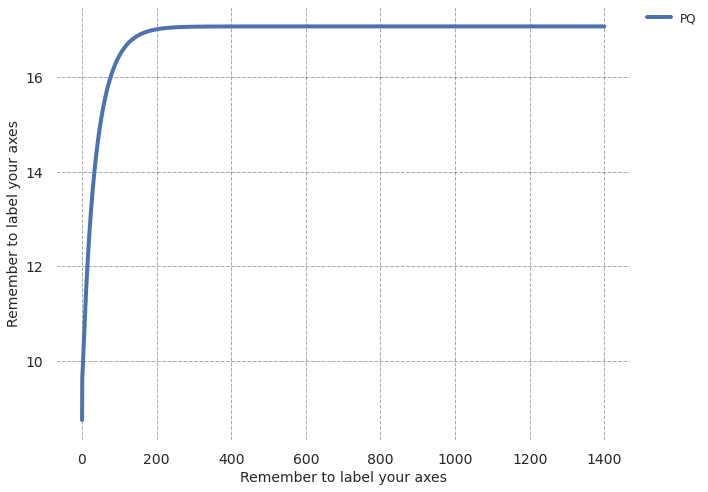

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from modelbase.ode import Simulator
from modelbase.ode import Model

from model import model as m

from y0_new_values import y0dark12, y0dark2, y0high2

In [63]:
# define the list of light intensities for which we run the simulation
# then refer to this list everywhere you can
# don't hard code any range(7) because now the list has length 7. This can change and good code should be dynamic
light = [100, 200, 500, 750, 1000]# , 1500, 2000] I could not run 150 for NPQ

In [64]:
# I stand by my first answe, that dictionaries are the most flexible
# I will be storing all results in a dictionary
y = dict()

In [65]:
y['State1'] = {}
for x in light:
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark12)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    s.simulate(900, steps=10000, **{'atol':1.e-12})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-12})
    y['State1'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [66]:
# investigate how the y dictionary looks like at the moment
y

{'State1': {100: {'Fluo': array([0.14231774, 0.14838609, 0.14997814, ..., 0.14590917, 0.14590967,
          0.14591017]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  200: {'Fluo': array([0.14630422, 0.15790041, 0.16457523, ..., 0.11970842, 0.11970997,
          0.11971153]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  500: {'Fluo': array([0.15782892, 0.20020858, 0.27711022, ..., 0.10383607, 0.10383867,
          0.10384127]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  750: {'Fluo': array([0.1669635 , 0.24513507, 0.55020287, ..., 0.10189914, 0.10190188,
          0.10190462]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  1000: {'Fluo': array([0.17570108, 0.2906247 , 0.56550108, ..., 0.10127679, 0.10127958,
         

In [68]:
y['State2'] = {}
for x in light:
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark2)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    s.simulate(900, steps=10000, **{'atol':1.e-12})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-12})
    y['State2'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [69]:
y['StateNPQ'] = {}

for x in light:
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0high2)
    s.update_parameters({"kProtonationL": 0.0096, "kDeprotonation": 0.0096, "kDeepoxV": 0.0024, "kEpoxZ": 0.00024})
    s.simulate(900, steps=10000, **{'atol':1.e-12})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-12})
    y['StateNPQ'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [ ]:
# noticed how much code is still copied? you could create another dictionary of the requirements
# if y.key() == 'State1' then update parameters with this set of parameters

# with PAM

In [87]:
Tmax =1400
dt = 60
pulse=0.8
Tdark = 900

yPAM = dict()

In [88]:
yPAM['State1'] = {}

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark12)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-16})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-16})
        t = s.get_time()[-1]
    yPAM['State1'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [96]:
yPAM['State2'] = {}


for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark2)
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-12})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-12})
        t = s.get_time()[-1]
    yPAM['State2'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [97]:
yPAM['StateNPQ'] = {}

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0high2)
    s.update_parameters({"kProtonationL": 0.0096, "kDeprotonation": 0.0096, "kDeepoxV": 0.0024, "kEpoxZ": 0.00024})
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-14})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-14})
        t = s.get_time()[-1]
    yPAM['StateNPQ'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

# Plot the results

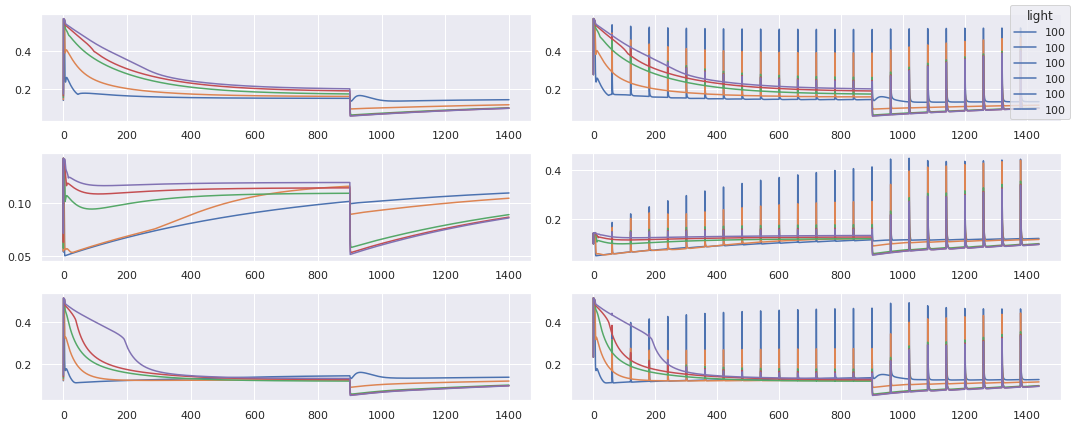

In [99]:
fig, axs = plt.subplots(3,2, figsize=(15, 6), facecolor='w', edgecolor='k')

j = 0
cnt = 0
for i in light: # this is more flexible. If I tell you to include mor elight inetnsities, you just need to ammend the light list
    axs[j][0].plot(y['State1'][i]['t'],y['State1'][i]['Fluo'], label=i if cnt == 0 else "")
    axs[+1][0].plot(y['State2'][i]['t'],y['State2'][i]['Fluo'], label=i if cnt == 100 else "")
    axs[j+2][0].plot(y['StateNPQ'][i]['t'],y['StateNPQ'][i]['Fluo'], label=i if i == 100 else "")
    
    axs[j][1].plot(yPAM['State1'][i]['t'],yPAM['State1'][i]['Fluo'], label=i if i == 100 else "")
    axs[j+1][1].plot(yPAM['State2'][i]['t'],yPAM['State2'][i]['Fluo'], label=i if i == 100 else "")
    axs[j+2][1].plot(yPAM['StateNPQ'][i]['t'],yPAM['StateNPQ'][i]['Fluo'], label=i if i == 100 else "")
    cnt += 1

fig.legend(title='light')#, ncol=3) # add the title to your legend and you can always play with number fo columns if you want to
fig.tight_layout()